# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 16. Data Modeling (part 3)

### Date: October 20, 2020

### To-Dos From Last Class:

* Enjoy life!
    
### Today:

* Linear Mixed-Effects Models
    * AKA multi-level models, mixed models, random effect models, etc.

### Homework

* Enjoy life!
* _Maybe_ download assignment 5 starter

In [1]:
# plot theme stuff
# Many palettes available online, can customize
# these are from: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9
my_palette <- c("#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00")

# This is the basic function I use for all the ggplots I create. 
# Modified from this black themed ggplot function: https://gist.github.com/jslefche/eff85ef06b4705e6efbc
my_theme = function(base_size = 24, base_family = "") {
  
  theme_grey(base_size = base_size, base_family = base_family) %+replace%
    
    theme(
      # Specify axis options
      axis.line = element_blank(),  
      axis.text.x = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.text.y = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.ticks = element_line(color = "black", size  =  0.2),
      axis.title.x = element_text(size = base_size, color = "black", margin = margin(10, 0, 0, 0)),
      axis.title.y = element_text(size = base_size, color = "black", angle = 90, margin = margin(0, 10, 0, 0)),  
      axis.ticks.length = unit(0.3, "lines"),   
      # Specify legend options
      legend.background = element_rect(color = NA, fill = "#ffffff"),  
      legend.key = element_rect(color = "black",  fill = "#ffffff"),  
      legend.key.size = unit(2, "lines"),  
      legend.key.height = NULL,  
      legend.key.width = NULL,      
      legend.text = element_text(size = base_size*0.8, color = "black"),  
      legend.title = element_text(size = base_size*0.8, face = "bold", hjust = 0, color = "black"),
      legend.position = "right",  
      legend.text.align = NULL,  
      legend.title.align = NULL,  
      legend.direction = "vertical",  
      legend.box = NULL, 
      # Specify panel options
      panel.background = element_rect(fill = "#ffffff", color  =  NA),  
      panel.border = element_rect(fill = NA, color = "black"),  
      panel.grid.major = element_line(color = "#ffffff"),  
      panel.grid.minor = element_line(color = "#ffffff"),  
      panel.spacing = unit(2, "lines"),
      # Specify facetting options
      strip.background = element_rect(fill = "grey30", color = "grey10"),  
      strip.text.x = element_text(size = base_size*0.8, color = "black"),  
      strip.text.y = element_text(size = base_size*0.8, color = "black",angle = -90),  
      # Specify plot options
      plot.background = element_rect(color = "#ffffff", fill = "#ffffff"),  
      plot.title = element_text(size = base_size*1.2, color = "black"),  
      plot.margin = unit(rep(1, 4), "lines")
    ) 
}

# So you want to model some data...

<img src='img/decision_tree.png' width='500'>

# Final option we'll code...

<img src='img/LMMs.png' width='500'>

Wonderful (relatively brief) intro lecture: https://www.youtube.com/watch?v=QCqF-2E86r0

## Things that often muck up regression and rm-anova in psych/neuro
* Nested factors that create non-independent observations. E.g...
    * Participant:demographic factors.
    * Rats:housing group.
    * For a good review on this issue in psychology -- Grawitch & Munz. (2004), <a href="https://www.researchgate.net/profile/Matthew_Grawitch/publication/250890649_Are_Your_Data_Nonindependent_A_Practical_Guide_to_Evaluating_Nonindependence_and_Within-Group_Agreement/links/546ba7670cf20dedafd535fe.pdf">_Understanding Statistics_</a>
* Missing data or unbalanced designs. E.g...
    * Repeated measures dataset with subjects missing obs
* Repeats as a continuous factor. E.g...
    * Time in longitudinal designs.
    
## LMMs are more flexible as they accommodate both fixed and random effects. 
* Fixed: Test for an effect of this parameter.
* Random: Control for non-independence from nested or hierarchical structure.


## Cautionary note:
* Too much flexibility in the statistical toolkit = a lack of standardized 'best practices'
    * <a href='https://www.sciencedirect.com/science/article/pii/S0749596X20300061'>Meteyard & Davies. (2020), _J Memory Lang_.</a>
* If the design is simple and there are no missing data, you will likely get identical results from LMM vs. rm-ANOVA. 


## Fixed vs. Random Effects -- Examples

* Influence of __dopamine agonists__ on __lever pulls__ in rats reared in __different cages__. 
    * _What is fixed and what is random?_
* Impact of __trauma__ exposure on __amygdalar reactivity__ to threat stimuli in a large __multi-site__ study.
    * _What is fixed and what is random?_
* __Age__-related decline in __midfrontal theta__ during conflict monitoring, measured longitudinally within __subjects__.
    * _What is fixed and what is random?_

## For the HCP example...

<img src='img/nih_tb.jpg' width='500'>

* Testing for age-related changes on specific fluid cog subscales
    * To keep it simple, select card sorting + flanker

In [2]:
library(tidyverse)

# loading the hcp_alldat.csv file
data <- 'misc_exercises/hcp_alldat.csv'
df <- read_csv(data)
# Compute ordinal age variable
df <- df %>%
    mutate(Age_ord = ifelse(Age=='22-25',1,
                           ifelse(Age=='26-30',2,3)))


# rearrange the dataframe from wide to long
lmm_df <- df %>%
    select(Subject,Age_ord,CardSort_Unadj,Flanker_Unadj) %>%
    pivot_longer(ends_with("_Unadj"),
                 names_to="NIH_Fluid",
                 values_to="Unadjusted_Scores")
                 

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Warning message:
“package ‘tibble’ was built under R version 3.5.2”
Warning message:
“package ‘tidyr’ was built under R version 3.5.2”
Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  .default = col_double(),
  Subject = col_integer(),
  Release = col_character(),
  Acquisition = col_character(),
  Gender = col_character(),
  Age = col_character(),
  `3T_Full_MR_Compl` = col_logical(),
  T1_Count = col_integer(),
  T2_Count = col_integer(),
  `3T_RS-fMRI_Count` = col_integer(),
  

In [3]:
# install.packages('lme4')
library(lme4)

# fit unadjusted NIH TB scores as a function of NIH_Fluid task and age
lmm_eg_main <- lmer(Unadjusted_Scores ~ Age_ord + NIH_Fluid + (1 | Subject),lmm_df)
summary(lmm_eg_main)

# generating p-values for the lmm
library(lmerTest)
summary(lmm_eg_main <- lmer(Unadjusted_Scores ~ Age_ord + NIH_Fluid + (1 | Subject),lmm_df))

# NHST
# 95% confidence intervals around the coefficient
print(lmm_eg_main_confintervals <- confint(lmm_eg_main,method = 'Wald'))

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




Linear mixed model fit by REML ['lmerMod']
Formula: Unadjusted_Scores ~ Age_ord + NIH_Fluid + (1 | Subject)
   Data: lmm_df

REML criterion at convergence: 16271.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5641 -0.5408 -0.0190  0.4961  2.7788 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 51.40    7.169   
 Residual             51.15    7.152   
Number of obs: 2222, groups:  Subject, 1112

Fixed effects:
                       Estimate Std. Error t value
(Intercept)            119.2374     0.8259 144.372
Age_ord                 -1.9738     0.3577  -5.517
NIH_FluidFlanker_Unadj  -3.4107     0.3035 -11.237

Correlation of Fixed Effects:
            (Intr) Age_rd
Age_ord     -0.930       
NIH_FldFl_U -0.183 -0.001


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Unadjusted_Scores ~ Age_ord + NIH_Fluid + (1 | Subject)
   Data: lmm_df

REML criterion at convergence: 16271.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5641 -0.5408 -0.0190  0.4961  2.7788 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 51.40    7.169   
 Residual             51.15    7.152   
Number of obs: 2222, groups:  Subject, 1112

Fixed effects:
                        Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             119.2374     0.8259 1187.2308 144.372  < 2e-16 ***
Age_ord                  -1.9738     0.3577 1110.7422  -5.517 4.28e-08 ***
NIH_FluidFlanker_Unadj   -3.4107     0.3035 1110.4795 -11.237  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Age_rd
Age_ord     -0.930       
NIH_FldFl_U -0.183 -0.001

                            2.5 %     97.5 %
.sig01                         NA         NA
.sigma                         NA         NA
(Intercept)            117.618670 120.856162
Age_ord                 -2.674985  -1.272666
NIH_FluidFlanker_Unadj  -4.005584  -2.815785


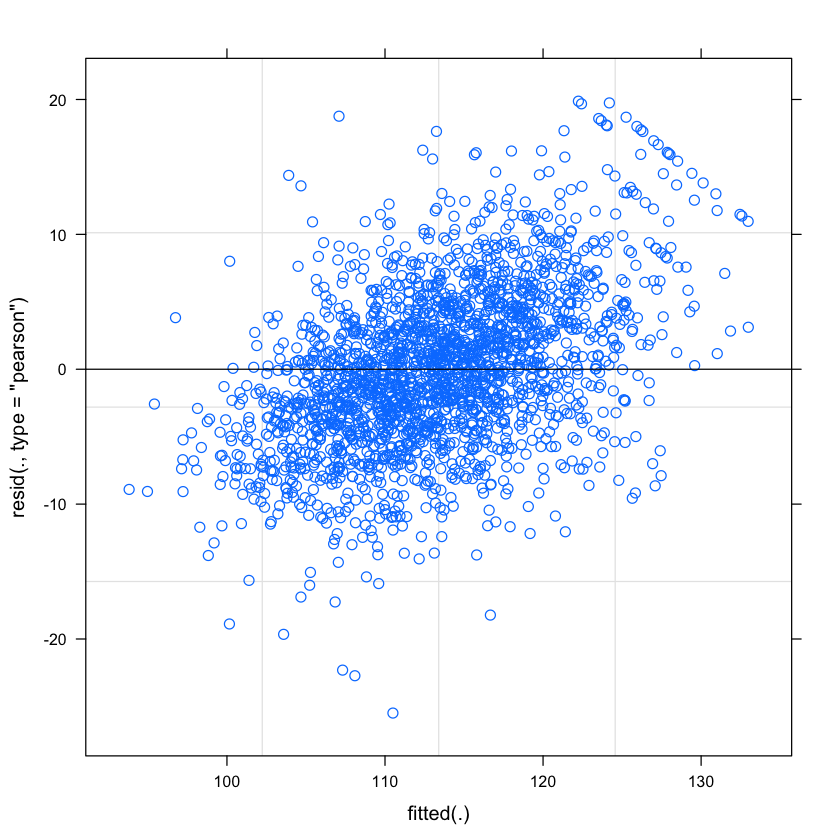

In [4]:
plot(lmm_eg_main)

# What if the data violates parametric assumptions?

In [5]:
library(robustlmm)

# Running the robust version of the model
summary(roblmm_eg_main <- rlmer(Unadjusted_Scores ~ 
                                NIH_Fluid + Age_ord + 
                                (1 | Subject),
                                lmm_df))



Robust linear mixed model fit by DAStau 
Formula: Unadjusted_Scores ~ NIH_Fluid + Age_ord + (1 | Subject) 
   Data: lmm_df 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8919 -0.5223 -0.0280  0.5044  3.8143 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 52.67    7.257   
 Residual             43.21    6.573   
Number of obs: 2222, groups: Subject, 1112

Fixed effects:
                       Estimate Std. Error t value
(Intercept)            119.1551     0.8303  143.50
NIH_FluidFlanker_Unadj  -3.5060     0.2861  -12.25
Age_ord                 -1.9734     0.3604   -5.48

Correlation of Fixed Effects:
            (Intr) NIH_FF
NIH_FldFl_U -0.172       
Age_ord     -0.932 -0.001

Robustness weights for the residuals: 
 1967 weights are ~= 1. The remaining 255 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.275   0.617   0.800   0.764   0.938   0.999 

Robustness weights for the random effects: 
 984 weights are 

In [6]:
# Code for generating wald confidence intervals for rlmer
confint.rlmerMod <- function(object,parm,level=0.95) {
     beta <- fixef(object)
     if (missing(parm)) parm <- names(beta)
     se <- sqrt(diag(vcov(object)))
     z <- qnorm((1+level)/2)
     ctab <- cbind(beta-z*se,beta+z*se)
     colnames(ctab) <- stats:::format.perc(c((1-level)/2,(1+level)/2),
                                           digits=3)
     return(ctab[parm,])
 }

# Code for getting p-values from rlmer
pvalue.rlmerMod <- function(lmer_object,rlmer_object) {
    # get coefficients from non-robust model to extract Satterthwaite approximated DFs
    coefs <- data.frame(coef(summary(lmer_object)))

    # get coefficients from robust model to extract t-values
    coefs.robust <- coef(summary(rlmer_object))

    # calculate p-values based on robust t-values and non-robust approx. DFs
    p.values <- 2*pt(abs(coefs.robust[,3]), coefs$df, lower=FALSE)
    print(p.values)
}

In [7]:
# generating confidence intervals for roblmm
confint.rlmerMod(roblmm_eg_main)

,2.5 %,97.5 %
(Intercept),117.527692,120.782519
NIH_FluidFlanker_Unadj,-4.066771,-2.945224
Age_ord,-2.679810,-1.267046


In [8]:
# generating p-values for roblmm
pvalue.rlmerMod(lmm_eg_main,roblmm_eg_main)

           (Intercept) NIH_FluidFlanker_Unadj                Age_ord 
          0.000000e+00           1.801476e-32           5.390422e-08 


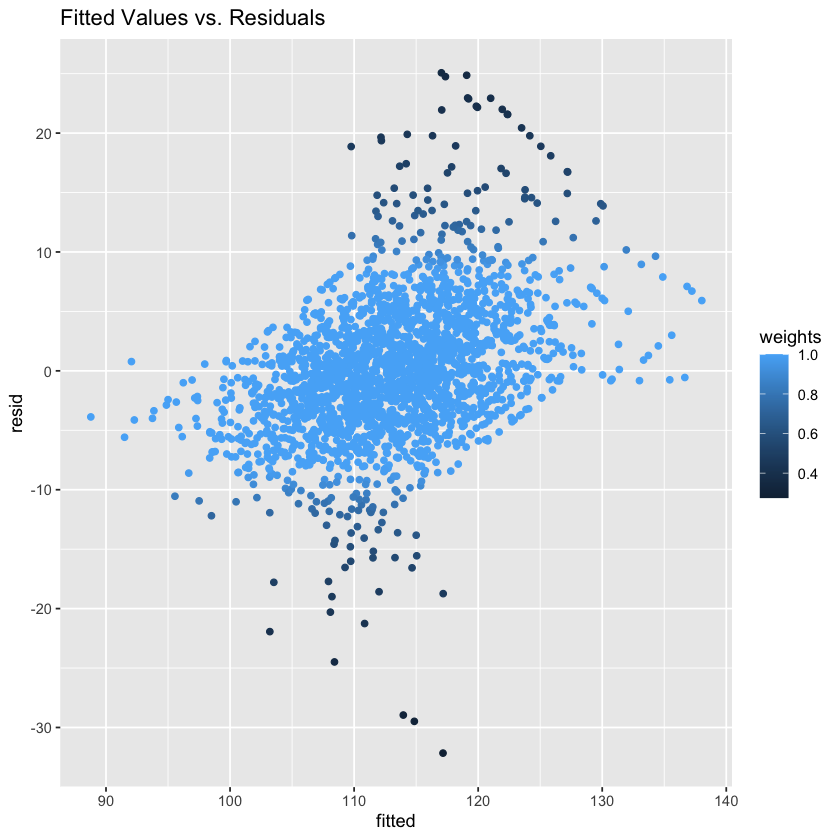

In [9]:
plot(roblmm_eg_main,which=1)

## What if we have nested random factors (e.g., testing cohort:participant)

In [11]:
# Testing cohort in HCP called the "Acquisition" grouping variable
unique(df$Acquisition)

# adding the cohort var to df
lmm_df <- df %>%
    select(Subject,Acquisition,Age_ord,Acquisition,CardSort_Unadj,Flanker_Unadj) %>%
    pivot_longer(ends_with('_Unadj'), 
                 names_to = "NIH_Fluid", 
                 values_to = "Unadjusted_Scores")

# running standard lme4

summary(lmm_eg_wnest <- lmer(Unadjusted_Scores ~ 
                             NIH_Fluid + Age_ord + 
                             (1 | Subject:Acquisition) + (1 | Acquisition), # subject effect w/in nest, + nested random effect
                             lmm_df))

[1] "Q11" "Q01" "Q03" "Q08" "Q06" "Q04" "Q13" "Q10" "Q12" "Q02" "Q07" "Q09"
[13] "Q05"

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Unadjusted_Scores ~ NIH_Fluid + Age_ord + (1 | Subject:Acquisition) +  
    (1 | Acquisition)
   Data: lmm_df

REML criterion at convergence: 16255.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5448 -0.5361 -0.0233  0.4988  2.7516 

Random effects:
 Groups              Name        Variance Std.Dev.
 Subject:Acquisition (Intercept) 49.209   7.015   
 Acquisition         (Intercept)  2.495   1.579   
 Residual                        51.152   7.152   
Number of obs: 2222, groups:  Subject:Acquisition, 1112; Acquisition, 13

Fixed effects:
                        Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             119.3869     0.9425  116.2039  126.67  < 2e-16 ***
NIH_FluidFlanker_Unadj   -3.4114     0.3035 1110.5415  -11.24  < 2e-16 ***
Age_ord                  -2.0732     0.3599 1107.6827   -5.76 1.09e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01

## Note on Interpretation
* The model designates that the fixed effects' intercept and coefficients pooled across random FX.
* Random effect intercepts allowed to vary randomly. (can also allow both intercept and slope vary randomly)
    * In lmer output, we only get information about the extent of variance in the random effects.
    * <a href="https://www.rdocumentation.org/packages/lme4/versions/1.1-23/topics/ranef">ranef</a> for more info. on random FX.